# À l'origine : le sac de mots

## Données

Repartons des données que nous avons mis en forme, et amenons progressivement une analyse plus avancée

In [3]:
import pandas as pd
df = pd.read_excel("../data/data.xlsx")
df.head()

,Unnamed: 0,id,title,publication_year,abstract
0,0,https://openalex.org/W2159397589,Computational Social Science,2009.0,A field is emerging that leverages the capacit...
1,1,https://openalex.org/W2070907364,Manifesto of computational social science,2012.0,NaN
2,2,https://openalex.org/W3081158114,Computational social science: Obstacles and op...,2020.0,"Data sharing, research ethics, and incentives ..."
3,3,https://openalex.org/W3022499311,Computational Social Science and Sociology,2020.0,The integration of social science with compute...
4,4,https://openalex.org/W3174174150,Integrating explanation and prediction in comp...,2021.0,NaN


nettoyage des données

In [4]:
df_ss = df[df["abstract"].notna()]
df_ss["texte"] = df_ss["title"] + ". " + df_ss["abstract"]
df_ss= df_ss[df_ss["texte"].notna()] # remove na
df_ss.head()

,Unnamed: 0,id,title,publication_year,abstract,texte
0,0,https://openalex.org/W2159397589,Computational Social Science,2009.0,A field is emerging that leverages the capacit...,Computational Social Science. A field is emerg...
2,2,https://openalex.org/W3081158114,Computational social science: Obstacles and op...,2020.0,"Data sharing, research ethics, and incentives ...",Computational social science: Obstacles and op...
3,3,https://openalex.org/W3022499311,Computational Social Science and Sociology,2020.0,The integration of social science with compute...,Computational Social Science and Sociology. Th...
5,5,https://openalex.org/W4389636360,Can Large Language Models Transform Computatio...,2023.0,Abstract Large language models (LLMs) are capa...,Can Large Language Models Transform Computatio...
7,7,https://openalex.org/W2790659496,Computational social science,2010.0,Abstract The social sciences investigate human...,Computational social science. Abstract The soc...


## Transformer le texte en nombres : le comptage de mots

- Détecter des patterns : regex https://regex101.com/
- Découper en mots et les compter
    - C'est quoi un mot ?
    - Comment on compte ?

### Avant le mot : le pattern

In [15]:
import re

In [16]:
re.findall(r"([0-9]{4})", "Ceci est une année : 1990 ; Ceci en est une autre 2000")

['1990', '2000']

In [61]:
masque = r"([0-9]{2}\s+(?:January|February|March|April|May|June|July|August|September|October|November|December)\s+\d{4})"
re.findall(masque, "It is the 21 September 2020 , we are all happy")

['21 September 2020']

In [62]:
c = re.compile(r"\bmodel\b",re.I)
c.findall("This is a model.")

['model']

In [63]:
df_ss["contains_model"] = df_ss["texte"].apply(lambda x: bool(c.search(str(x))))
df_ss["contains_model"].value_counts()

contains_model
False    1247
True      342
Name: count, dtype: int64

In [64]:
df_ss.head()

,Unnamed: 0,id,title,publication_year,abstract,texte,contains_model
0,0,https://openalex.org/W2159397589,Computational Social Science,2009.0,A field is emerging that leverages the capacit...,Computational Social Science. A field is emerg...,False
2,2,https://openalex.org/W3081158114,Computational social science: Obstacles and op...,2020.0,"Data sharing, research ethics, and incentives ...",Computational social science: Obstacles and op...,False
3,3,https://openalex.org/W3022499311,Computational Social Science and Sociology,2020.0,The integration of social science with compute...,Computational Social Science and Sociology. Th...,False
5,5,https://openalex.org/W4389636360,Can Large Language Models Transform Computatio...,2023.0,Abstract Large language models (LLMs) are capa...,Can Large Language Models Transform Computatio...,False
7,7,https://openalex.org/W2790659496,Computational social science,2010.0,Abstract The social sciences investigate human...,Computational social science. Abstract The soc...,False


### Découper en mots

Avec une méthode un peu directe

In [43]:
df_ss["texte"].apply(lambda x: x.split(" ")).head()

0    [Computational, Social, Science., A, field, is...
2    [Computational, social, science:, Obstacles, a...
3    [Computational, Social, Science, and, Sociolog...
5    [Can, Large, Language, Models, Transform, Comp...
7    [Computational, social, science., Abstract, Th...
Name: texte, dtype: object

### Utiliser NLTK

In [44]:
#pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [46]:
import nltk
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
texte = "Ceci est un test. Coucou, je fais du Python. N'est-ce-pas ?"
word_tokenize(texte, language="french")

['Ceci',
 'est',
 'un',
 'test',
 '.',
 'Coucou',
 ',',
 'je',
 'fais',
 'du',
 'Python',
 '.',
 "N'est-ce-pas",
 '?']

Limite du tokenizer...

### Bigram : groupes de mots

Compter les bigrams

In [49]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

def generate_bigrams_nltk(text):
    tokens = word_tokenize(text.lower())
    bigrams = list(ngrams(tokens, 2))
    return bigrams

generate_bigrams_nltk(texte)

[('ceci', 'est'),
 ('est', 'un'),
 ('un', 'test'),
 ('test', '.'),
 ('.', 'coucou'),
 ('coucou', ','),
 (',', 'je'),
 ('je', 'fais'),
 ('fais', 'du'),
 ('du', 'python'),
 ('python', '.'),
 ('.', "n'est-ce-pas"),
 ("n'est-ce-pas", '?')]

### Préprocessing : nettoyer les données

- Beaucoup d'opérations de nettoyage, spécifiques à chaque tache

In [11]:
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords

english_stopwords = list(set(stopwords.words("english")))

def generate_bigrams_nltk(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token.isalnum() and token not in english_stopwords]
    bigrams = list(ngrams(filtered_tokens, 2))
    return bigrams

generate_bigrams_nltk(df_ss.loc[0, "texte"])


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emilien/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'word_tokenize' is not defined

## DTM : document term matrix

Rapide avec Scikit-learn

In [20]:
#pip install scikit-learn

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

english_stopwords = list(set(stopwords.words("english")))

# créer mon object de ML
vectorizer = CountVectorizer(stop_words=english_stopwords + [str(i) for i in range(0, 3000)], 
                             ngram_range=(1, 1), 
                             max_features=500)

# appliquer sur les données
X = vectorizer.fit_transform(df_ss["texte"])
X = pd.DataFrame(X.toarray(),columns=list(vectorizer.get_feature_names_out()))
X

,ability,abstract,academic,access,accuracy,across,action,activity,address,advanced,...,wide,within,without,word,work,working,workshop,world,years,yet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,2,0,1,1,0,1,1,1,2,0,...,1,3,0,1,4,0,0,2,1,2
1585,1,1,0,0,0,2,0,1,0,0,...,0,0,0,0,3,2,2,6,0,1
1586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,10,0,0,1,0,0
1587,0,0,0,0,1,0,0,1,0,2,...,0,0,0,0,1,0,0,0,0,0


## Une version un peu plus avancée

- Term Frequency-Inverse Document Frequency
    - Amélioration du DTM
- Approche souvent utilisée pour mettre en valeur les mots les plus spécifiques
- `Scikit-learn` a `TfidfVectorizer`

$$\text{TF-IDF}(t, d, D) = \left( \frac{f_{t,d}}{n_d} \right) \times \log \left(\frac{N}{\text{df}_t} \right)
$$

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

stopwords_english = list(set(stopwords.words("english")))

# créer un objet
vectorizer = TfidfVectorizer(stop_words=stopwords_english, 
                             ngram_range=(1, 1), 
                             max_features=500)

# applique 
X = vectorizer.fit_transform(df_ss["texte"])

# mettre en forme
X = pd.DataFrame(X.toarray(),columns=list(vectorizer.get_feature_names_out()))
X

,10,13,19,2019,2020,2021,2022,2024,2025,ability,...,wide,within,without,word,work,working,workshop,world,years,yet
0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.073534,0.000000,0.000000,0.064712,0.000000,0.000000,0.000000,0.00000,0.000000
3,0.000000,0.103560,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.079912,0.000000,0.057021,0.000000,0.000000,0.000000,0.00000,0.000000
4,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.115280,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.044213,...,0.021899,0.047891,0.000000,0.024555,0.056195,0.000000,0.000000,0.034236,0.01978,0.040229
1585,0.241972,0.062058,0.035399,0.0,0.000000,0.0,0.000000,0.0,0.0,0.017923,...,0.000000,0.000000,0.000000,0.000000,0.034169,0.035845,0.041162,0.083269,0.00000,0.016307
1586,0.039945,0.239042,0.000000,0.0,0.028261,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.015337,0.087745,0.000000,0.000000,0.010691,0.00000,0.000000
1587,0.005411,0.006476,0.027705,0.0,0.017227,0.0,0.006476,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.003566,0.000000,0.000000,0.000000,0.00000,0.000000


Les mots les plus significatifs

In [33]:
df_ss["texte"].iloc[4]

'Computational social science. Abstract The social sciences investigate human and social dynamics and organization at all levels of analysis (consilience), including cognition, decision making, behavior, groups, organizations, societies, and the world system. Computational social science is the integrated, interdisciplinary pursuit of social inquiry with emphasis on information processing and through the medium of advanced computation. The main computational social science areas are automated information extraction systems, social network analysis, social geographic information systems (GIS), complexity modeling, and social simulation models. Just like Galileo exploited the telescope as the key instrument for observing and gaining a deeper and empirically truthful understanding of the physical universe, computational social scientists are learning to exploit the advanced and increasingly powerful instruments of computation to see beyond the visible spectrum of more traditional discipli

In [34]:
X.loc[4].sort_values()

10             0.000000
power          0.000000
potential      0.000000
posts          0.000000
post           0.000000
                 ...   
amp            0.176530
systems        0.210483
information    0.275564
advanced       0.294041
social         0.408155
Name: 4, Length: 500, dtype: float64

Distance entre deux éléments

In [38]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(X.loc[120, :].values.reshape(1, -1), 
                  X.loc[126, :].values.reshape(1, -1))

array([[0.01692165]])

Toutes les distances, et récupérer le document le plus proche

In [41]:
from sklearn.metrics.pairwise import pairwise_distances

distances = pd.DataFrame(pairwise_distances(X, metric="cosine"))
distances

,0,1,2,3,4,5,6,7,8,9,...,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588
0,0.000000,0.922013,0.876177,0.971775,0.930771,0.923421,0.820518,0.970892,0.728949,0.865952,...,0.952172,0.988953,0.993438,0.993438,0.979514,0.835028,0.921583,0.959399,0.986235,0.986235
1,0.922013,0.000000,0.912540,0.940783,0.877305,0.959236,0.824376,0.932381,0.822157,0.906436,...,0.966668,0.979981,0.986173,0.986173,0.955988,0.889783,0.978177,0.942778,0.974729,0.974729
2,0.876177,0.912540,0.000000,0.940870,0.802279,0.867524,0.811594,0.778514,0.849415,0.818734,...,0.947846,0.945207,0.985163,0.985163,0.953003,0.884298,0.880577,0.816220,0.938627,0.938627
3,0.971775,0.940783,0.940870,0.000000,0.888832,0.819522,0.814764,0.934510,0.903959,0.859837,...,0.850610,0.983201,0.992740,0.992740,0.968351,0.937175,0.946007,0.928330,0.979552,0.979552
4,0.930771,0.877305,0.802279,0.888832,0.000000,0.881798,0.822529,0.806818,0.712845,0.830550,...,0.904995,0.867623,0.976571,0.976571,0.960570,0.896906,0.764048,0.903955,0.937666,0.937666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,0.835028,0.889783,0.884298,0.937175,0.896906,0.915195,0.793423,0.910563,0.724953,0.820820,...,0.895861,0.964572,0.978499,0.978499,0.920730,0.000000,0.890934,0.826686,0.742177,0.742177
1585,0.921583,0.978177,0.880577,0.946007,0.764048,0.775787,0.877916,0.875638,0.863338,0.881111,...,0.853612,0.672998,0.916873,0.916873,0.924682,0.890934,0.000000,0.883461,0.917143,0.917143
1586,0.959399,0.942778,0.816220,0.928330,0.903955,0.946460,0.921616,0.915457,0.935743,0.922868,...,0.741063,0.920101,0.985427,0.985427,0.929129,0.826686,0.883461,0.000000,0.817437,0.817437
1587,0.986235,0.974729,0.938627,0.979552,0.937666,0.972299,0.952069,0.948315,0.918872,0.972195,...,0.946123,0.947533,0.976820,0.976820,0.946784,0.742177,0.917143,0.817437,0.000000,0.000000


### Application avec le clustering

Créer la matrice de distances

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(X.values, method='ward') 

Représenter la figure

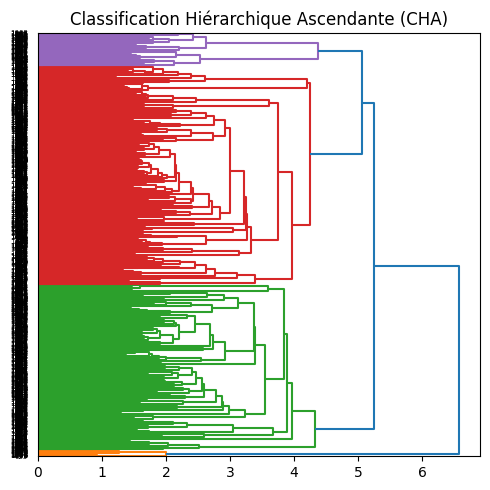

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
dendrogram(Z, orientation='right')
plt.title("Classification Hiérarchique Ascendante (CHA)")
plt.tight_layout()
plt.show()

Clustering

In [47]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4,  linkage='ward')
labels = cluster.fit_predict(X.values)
df_ss['cluster'] = labels

Contenu des clusters

In [59]:
df_w = pd.DataFrame(X.values, 
                    columns=vectorizer.get_feature_names_out()) 
df_w[df_ss.reset_index()["cluster"] == 0].max().sort_values()[-20:]

experiments    0.462097
issue          0.471088
tasks          0.473695
opinion        0.477537
scientists     0.481563
accuracy       0.487944
artificial     0.504709
simulations    0.510666
population     0.524352
annotation     0.524402
methodology    0.525463
agent          0.553831
ai             0.557719
survey         0.565567
agents         0.635390
code           0.646972
llms           0.673430
simulation     0.673650
llm            0.682399
emergence      0.781898
dtype: float64

## Application : Faire un nuage de mots avec WordCloud

Un coup d'oeil à la [documentation](https://amueller.github.io/word_cloud/)